# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.3 - 2D function fit
  
Here we extend the model to fit a trigonometric 2D function: $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

For the model we use the parameters that were found to be the best in the previous exercise:

- number of layers: 3
- number of neurons in each layer: 50
- activation function: 'selu'
- optimizer: 'Adam'
- loss function: 'logcosh'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

In [2]:
def f(x, y):
    return np.sin(x**2+y**2)

a=-3/2
b=3/2

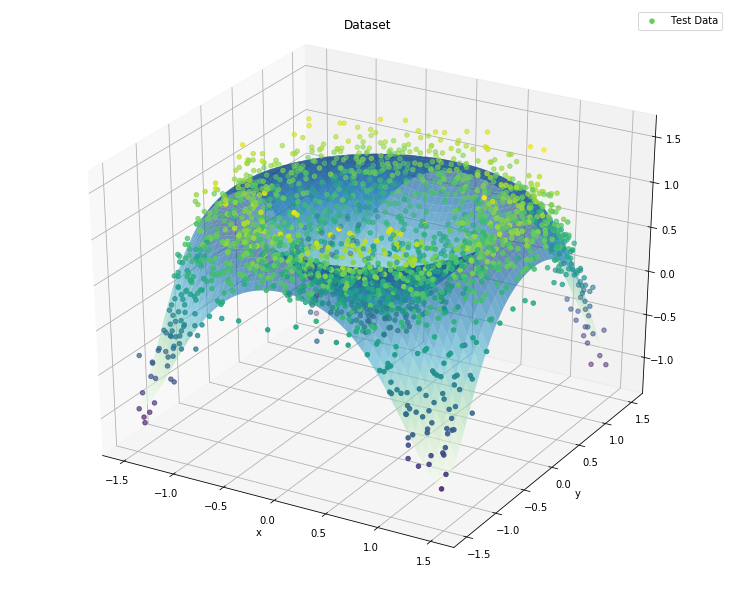

In [3]:
n_valid=2000
n_train=10*n_valid
sigma=0.2
n_epochs=150
    
# generate training inputs and validation inputs
np.random.seed(0)

xy_train=np.zeros((n_train,2))
xy_train[:,0]=np.random.uniform(a, b, n_train) 
xy_train[:,1]=np.random.uniform(a, b, n_train)

xy_valid=np.zeros((n_valid,2))
xy_valid[:,0]=np.random.uniform(a, b, n_valid) 
xy_valid[:,1]=np.random.uniform(a, b, n_valid)

z_target=f(xy_valid[:,0],xy_valid[:,1]) # target function

z_train= np.random.normal(f(xy_train[:,0], xy_train[:,1]), sigma)  # actual measures from which we want to guess regression parameters
z_valid= np.random.normal(f(xy_valid[:,0], xy_valid[:,1]), sigma)

# plot dataset
X = np.copy(xy_valid[:,0])
Y = np.copy(xy_valid[:,1])
X.sort()
Y.sort()
X, Y = np.meshgrid(X,Y)
Z=f(X,Y)

fig = plt.figure(figsize=(10, 8))
plt.suptitle("Dataset")

ax = Axes3D(fig)
ax.scatter(xy_valid[:,0], xy_valid[:,1], z_valid, c=z_valid, cmap='viridis', label='Test Data')
ax.plot_surface(X, Y ,Z, cmap='GnBu', linewidth=0, antialiased=True, alpha=0.6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

In [5]:
n_neurons=50
n_layers=3
activ='selu'
opt='Adam'
lo='logcosh'

# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(n_neurons, input_shape=(2,), activation=activ))

for i in range(n_layers):
    model.add(Dense(n_neurons, activation=activ))

model.add(Dense(1))

# compile the model 
model.compile(optimizer=opt, loss=lo, metrics=['mse'])
history= model.fit(xy_valid, z_valid, batch_size=32, epochs=n_epochs, 
                   validation_data=(xy_valid, z_valid), verbose=0)
#model.summary()

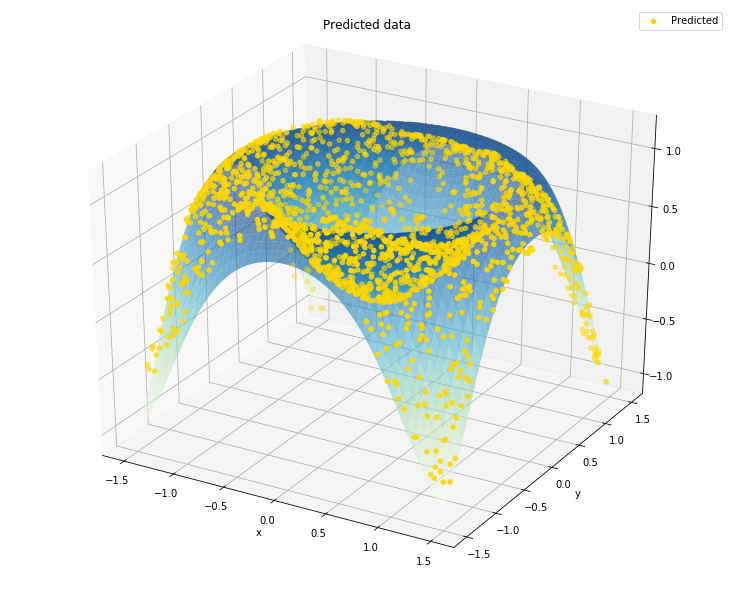


 Model performance:
– Test loss: 0.02354314737021923
– Test accuracy: 0.04821062460541725 



In [6]:
# evaluate model
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=0)

# predict
xy_predicted=np.zeros((n_valid,2))
xy_predicted[:,0]=np.random.uniform(a, b, n_valid) 
xy_predicted[:,1]=np.random.uniform(a, b, n_valid)

z_predicted = model.predict(xy_predicted)

fig = plt.figure(figsize=(10,8))
plt.suptitle("Predicted data")

ax = Axes3D(fig)
ax.scatter(xy_predicted[:,0], xy_predicted[:,1], z_predicted, c='gold', label='Predicted')
ax.plot_surface(X, Y ,Z, cmap='GnBu', linewidth=0, antialiased=True, alpha=0.6)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()

plt.show()

print('\n', 'Model performance:')
print('– Test loss:', score[0])
print('– Test accuracy:', score[1],'\n')

As we can see from above, we obtain good results in fitting a a trigonometric 2D function too.